In [ ]:
!unzip "/content/Top Indian Fruits Dataset_Clean Images.zip" 

CUSTOMIZING THE DATASET


In [ ]:
#!pip install split-folders
#import splitfolders 
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import keras
import keras.utils
from keras import utils as np_utils
import glob

In [ ]:
# splitting data into train, val and test sets
splitfolders.ratio("/content/Top Indian Fruits Dataset_Clean Images/FruitDataSet of 256x256 Size_12000 Images", output= "output/", seed=1337, ratio=(.8, .1, .1), group_prefix=None) 

Copying files: 12000 files [00:02, 4269.26 files/s]


In [ ]:
train_data_dir = '/content/output/train'
test_data_dir = '/content/output/test'
val_data_dir = '/content/output/val'

PREPROCESSING THE DATA


In [ ]:
x_train=[]

for folder in os.listdir(train_data_dir):

    sub_path=train_data_dir+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(40,40))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_data_dir):

    sub_path=test_data_dir+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(40,40))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_data_dir):

    sub_path=val_data_dir+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(40,40))

        x_val.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (40, 40),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_data_dir,
                                            target_size = (40, 40),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_data_dir,
                                            target_size = (40, 40),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 9600 images belonging to 12 classes.
Found 1200 images belonging to 12 classes.
Found 1200 images belonging to 12 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices

{'Apple_Bad': 0,
 'Apple_Good': 1,
 'Banana_Bad': 2,
 'Banana_Good': 3,
 'Guava_Bad': 4,
 'Guava_Good': 5,
 'Lime_Bad': 6,
 'Lime_Good': 7,
 'Orange_Bad': 8,
 'Orange_Good': 9,
 'Pomegranate_Bad': 10,
 'Pomegranate_Good': 11}

In [ ]:
class_indices = training_set.class_indices
print(class_indices)

{'Apple_Bad': 0, 'Apple_Good': 1, 'Banana_Bad': 2, 'Banana_Good': 3, 'Guava_Bad': 4, 'Guava_Good': 5, 'Lime_Bad': 6, 'Lime_Good': 7, 'Orange_Bad': 8, 'Orange_Good': 9, 'Pomegranate_Bad': 10, 'Pomegranate_Good': 11}


DATA VISUALIZATION


In [ ]:
X_flat_train = train_x.reshape(train_x.shape[0], 40*40*3)
X_flat_test = test_x.reshape(test_x.shape[0], 40*40*3)
train_y = to_categorical(train_y, 14)
test_y = to_categorical(test_y, 14)
print('Original Sizes:', train_x.shape, test_x.shape, train_y.shape, test_y.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (9600, 40, 40, 3) (1200, 40, 40, 3) (9600, 14) (1200, 14)
Flattened: (9600, 4800) (1200, 4800)


In [ ]:
train_y.shape,test_y.shape,val_x.shape

((9600, 14), (1200, 14), (1200, 40, 40, 3))

(40, 40, 3)


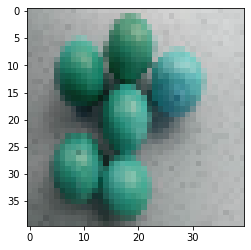

In [ ]:
print(train_x[0].shape)
plt.imshow(train_x[0])
plt.show()

IMAGE AUGUMENTATION


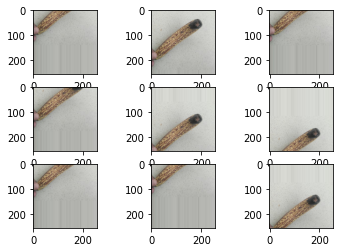

In [ ]:

# example of vertical shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/output/train/Banana_Bad/IMG_20190910_175138.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=5,input_shape=(40, 40, 3), activation = 'relu'))
model.add(Conv2D(32, kernel_size=5, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=3, activation = 'relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(14, activation = "softmax"))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.RMSprop(),
              metrics=['accuracy'])




In [ ]:
history = model.fit(train_x, train_y,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(test_x, test_y))
score = model.evaluate(test_x, test_y, verbose=0)

Epoch 1/20
150/150 [==============================] - 81s 540ms/step - loss: 0.2532 - accuracy: 0.9293 - val_loss: 0.3962 - val_accuracy: 0.9025
Epoch 2/20
150/150 [==============================] - 81s 539ms/step - loss: 0.2384 - accuracy: 0.9341 - val_loss: 0.6732 - val_accuracy: 0.8542
Epoch 3/20
150/150 [==============================] - 81s 539ms/step - loss: 0.2129 - accuracy: 0.9380 - val_loss: 0.1188 - val_accuracy: 0.9650
Epoch 4/20
150/150 [==============================] - 82s 544ms/step - loss: 0.1847 - accuracy: 0.9509 - val_loss: 0.5677 - val_accuracy: 0.8550
Epoch 5/20
150/150 [==============================] - 81s 543ms/step - loss: 0.1816 - accuracy: 0.9495 - val_loss: 0.1450 - val_accuracy: 0.9575
Epoch 6/20
150/150 [==============================] - 81s 542ms/step - loss: 0.1702 - accuracy: 0.9564 - val_loss: 0.2265 - val_accuracy: 0.9417
Epoch 7/20
150/150 [==============================] - 81s 539ms/step - loss: 0.1585 - accuracy: 0.9573 - val_loss: 0.5224 - val_ac

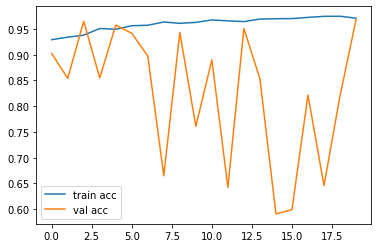

In [ ]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()


plt.show()

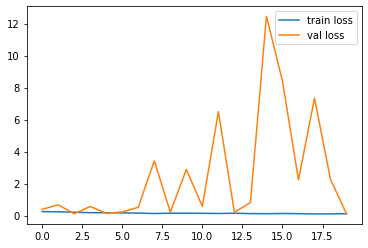

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11494625359773636
Test accuracy: 0.9683333039283752


In [ ]:
y_pred = model.predict(test_x)
print(y_pred)

[[1.0000000e+00 5.0117028e-20 9.2662036e-26 ... 2.1151401e-18
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 9.3007371e-25 3.1199512e-30 ... 5.2515205e-19
  0.0000000e+00 0.0000000e+00]
 [9.9949884e-01 9.3817063e-05 1.1735624e-06 ... 2.1835661e-04
  2.4167536e-16 2.3273376e-15]
 ...
 [1.7582673e-12 8.2721883e-09 4.2470923e-17 ... 1.0000000e+00
  2.1023396e-35 7.2518608e-38]
 [1.4128881e-05 6.8701161e-10 1.2364601e-19 ... 9.9998581e-01
  0.0000000e+00 0.0000000e+00]
 [4.5752618e-06 4.5973546e-04 2.0594923e-06 ... 9.9953365e-01
  2.4382438e-19 1.7995843e-19]]


Enter the index of any picture from the test batch to predict ie. enter a number from 1 to 1200:  565

Prediction: 
 [5.93893725e-34 6.35164190e-14 1.48499878e-27 2.25968972e-15
 1.17381935e-23 1.00000000e+00 8.09457369e-23 6.31740646e-20
 2.24644472e-23 6.42009899e-20 4.53896681e-22 9.62075137e-25
 0.00000000e+00 0.00000000e+00]

Actual: 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


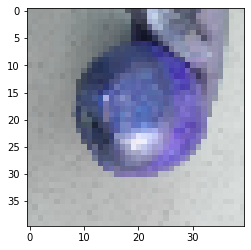

In [ ]:
x=int(input("Enter the index of any picture from the test batch to predict ie. enter a number from 1 to 1200:  "))
print("\nPrediction: \n",y_pred[x])
print("\nActual: \n",test_y[x])
print(training_set)
plt.imshow(test_x[x])